<a href="https://colab.research.google.com/github/jonesLevin/Machine-Learning/blob/main/Kaggle_Api_DataSet_Loading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"levinjones","key":"6919be1a7f628b7934fd34419d2c0b03"}'}

In [3]:
!mkdir ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets list

ref                                                    title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
deepcontractor/mcdonalds-india-menu-nutrition-facts    McDonald's India : Menu Nutrition Dataset          5KB  2022-07-28 17:08:52           2565        119  0.9411765        
iamsouravbanerjee/house-rent-prediction-dataset        House Rent Prediction Dataset                     82KB  2022-08-20 13:49:03           2565        103  1.0              
arianazmoudeh/airbnbopendata                           Airbnb Open Data                                  10MB  2022-08-01 15:58:10           1758         63  0.9705882        
ericsims/world-cheese-awards-worlds-cheesiest-dataset  World Cheese Awards (World's Cheesiest Dataset)   49KB  2022-08-1

In [7]:
!kaggle datasets download -d camnugent/california-housing-prices

  0% 0.00/400k [00:00<?, ?B/s]
100% 400k/400k [00:00<00:00, 103MB/s]


In [8]:
!unzip california-housing-prices.zip

Archive:  california-housing-prices.zip
  inflating: housing.csv             


Importing Libraries

In [9]:
import pandas as pd
import numpy as np

In [79]:
data = pd.read_csv('/content/housing.csv')

In [80]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [81]:
data.shape

(20640, 10)

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Data Preprocessing

In [83]:
data = pd.get_dummies(data, columns=['ocean_proximity'], prefix=['proximity'], drop_first=True)

In [84]:
data['proximity_ISLAND'].value_counts()

0    20635
1        5
Name: proximity_ISLAND, dtype: int64

In [85]:
data.drop(['proximity_ISLAND'], axis=1, inplace=True)

In [86]:
columns = data.columns

In [87]:
data['total_bedrooms'] = data['total_bedrooms'].fillna(data['total_bedrooms'].mode()[0])

In [88]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms          0
population              0
households              0
median_income           0
median_house_value      0
proximity_INLAND        0
proximity_NEAR BAY      0
proximity_NEAR OCEAN    0
dtype: int64

Data Scaling

In [89]:
from sklearn.preprocessing import StandardScaler, Normalizer

In [90]:
scaler = StandardScaler()
scaler.fit(data)
data = scaler.transform(data)

In [91]:
data = pd.DataFrame(data, columns=columns)

In [92]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,proximity_INLAND,proximity_NEAR BAY,proximity_NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.804819,-0.967245,-0.974429,-0.977033,2.344766,2.129631,-0.681889,2.830742,-0.384466
1,-1.322844,1.043185,-0.607019,2.045890,1.358707,0.861439,1.669961,2.332238,1.314156,-0.681889,2.830742,-0.384466
2,-1.332827,1.038503,1.856182,-0.535746,-0.822021,-0.820777,-0.843637,1.782699,1.258693,-0.681889,2.830742,-0.384466
3,-1.337818,1.038503,1.856182,-0.624215,-0.714889,-0.766028,-0.733781,0.932968,1.165100,-0.681889,2.830742,-0.384466
4,-1.337818,1.038503,1.856182,-0.462404,-0.607758,-0.759847,-0.629157,-0.012881,1.172900,-0.681889,2.830742,-0.384466


In [93]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'proximity_INLAND', 'proximity_NEAR BAY',
       'proximity_NEAR OCEAN'],
      dtype='object')

Dimensionality Reduction

In [94]:
from sklearn.decomposition import PCA

In [95]:
data[['total_rooms', 'total_bedrooms', 'households']].corr()

,total_rooms,total_bedrooms,households
total_rooms,1.000000,0.925723,0.918484
total_bedrooms,0.925723,1.000000,0.972731
households,0.918484,0.972731,1.000000


In [96]:
data_red = data[['total_rooms', 'total_bedrooms', 'households']].to_numpy()

In [97]:
pca = PCA(n_components=2)
pca.fit(data_red)
data_pca = pca.transform(data_red)

In [98]:
data_pca = pd.DataFrame(data_pca, columns=['total_rooms', 'total_bedrooms'])

In [99]:
data_pca.head()

,total_rooms,total_bedrooms
0,-1.588296,0.123298
1,2.925743,0.444372
2,-1.272998,0.232246
3,-1.197423,0.072254
4,-0.982142,0.119774


In [100]:
data.drop(['total_rooms', 'total_bedrooms', 'households'], axis=1, inplace=True)

In [105]:
data = pd.concat([data, data_pca], axis=1)

Model Training

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [106]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'population',
       'median_income', 'median_house_value', 'proximity_INLAND',
       'proximity_NEAR BAY', 'proximity_NEAR OCEAN', 'total_rooms',
       'total_bedrooms'],
      dtype='object')

In [107]:
X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [108]:
X.head()

,longitude,latitude,housing_median_age,population,median_income,proximity_INLAND,proximity_NEAR BAY,proximity_NEAR OCEAN,total_rooms,total_bedrooms
0,-1.327835,1.052548,0.982143,-0.974429,2.344766,-0.681889,2.830742,-0.384466,-1.588296,0.123298
1,-1.322844,1.043185,-0.607019,0.861439,2.332238,-0.681889,2.830742,-0.384466,2.925743,0.444372
2,-1.332827,1.038503,1.856182,-0.820777,1.782699,-0.681889,2.830742,-0.384466,-1.272998,0.232246
3,-1.337818,1.038503,1.856182,-0.766028,0.932968,-0.681889,2.830742,-0.384466,-1.197423,0.072254
4,-1.337818,1.038503,1.856182,-0.759847,-0.012881,-0.681889,2.830742,-0.384466,-0.982142,0.119774


In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=23)

In [110]:
model = LinearRegression()

In [111]:
model.fit(X_train, y_train)

LinearRegression()

In [128]:
prediction = model.predict(X_test)

Model Evaluation

In [125]:
from sklearn.metrics import r2_score


In [129]:
score = r2_score(y_test, prediction)

In [130]:
score

0.6489859679675885

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

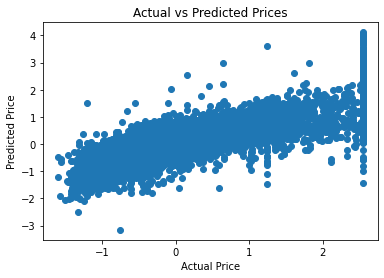

In [131]:
plt.scatter(y_test, prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()